<a href="https://colab.research.google.com/github/ABHIRAM199/my_practice/blob/main/Long_Short_Term_Memory_(LSTM)_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Long Short-Term Memory (LSTM)

# Agenda
* Introduction to LSTM
* LSTM Cell Architecture
* Understanding Gates in LSTM
* Training LSTM Networks
* Applications of LSTM
* Variants of LSTM
* Implementation of LSTM

#Introduction to LSTM

- Long Short-Term Memory (LSTM) networks are a specialized type of recurrent neural network (RNN) designed to address the vanishing gradient problem commonly encountered in traditional RNNs. This problem arises because gradients used for updating weights can become very small during backpropagation, preventing the network from learning effectively from long-term dependencies. LSTMs mitigate this issue by introducing a more complex architecture that includes memory cells and various gating mechanisms to control the flow of information.

**Key Characteristics of LSTMs**
- **Memory Cells:** LSTMs have a unique structure known as memory cells that can maintain information for long periods. These cells use gated mechanisms to control the flow of information.

- **Gated Mechanisms:** LSTM cells have three main gates—forget gate, input gate, and output gate—that regulate the information flowing through the network.

- **Forget Gate:** Decides what information to discard from the cell state.
- **Input Gate:** Determines which new information to add to the cell state.
- **Output Gate:** Controls what information to output from the cell state.
- **Ability to Learn Long-Term Dependencies:** Due to their gating mechanisms, LSTMs can learn dependencies over long time steps, which traditional RNNs struggle with.


**Applications of LSTMs, LSTMs are used in a variety of domains, including:**

- **Natural Language Processing (NLP):** For tasks like language modeling, machine translation, text generation, and sentiment analysis.
- **Speech Recognition:** For recognizing spoken words and phrases.
- **Time Series Forecasting:** For predicting future values in sequences of data.
- **Video Analysis:** For tasks such as action recognition and video captioning.
- **Anomaly Detection:** For identifying unusual patterns in sequential data.


# LSTM Cell Architecture

**Key Components of LSTM**
- LSTMs consist of several key components that work together to manage the flow of information through the network:


**Cell State ($C_t$):** This is the long-term memory of the network, which can be modified by the different gates. The cell state allows LSTMs to retain information over long periods.

**Hidden State ($h_t$):** The hidden state is the short-term memory of the network, which is used for current predictions and is passed to the next time step.

**Input Gate ($i_t$):** The input gate controls how much of the new information from the current input and previous hidden state should be added to the cell state.

**Forget Gate ($f_t$):** The forget gate controls how much of the previous cell state should be retained. It decides what information to discard from the cell state.

**Output Gate ($o_t$):** The output gate determines how much of the cell state should be used to compute the current hidden state, which will also be the output of the LSTM cell for the current time step.

**Cell Input Activation ($\tilde{C}_t$):** This is a candidate value that is created using the current input and the previous hidden state. This candidate value is added to the cell state under the control of the input gate.

#### Python Code for LSTM

Implementing an LSTM using Python and TensorFlow/Keras:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define a simple LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(10, 1)))  # 50 units, input shape (timesteps, features)
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mse')

# Example data
import numpy as np

X = np.random.rand(100, 10, 1)  # 100 samples, 10 timesteps, 1 feature
y = np.random.rand(100, 1)  # 100 samples, 1 target

# Train the model
model.fit(X, y, epochs=10)


Epoch 1/10
4/4 [==============================] - 3s 11ms/step - loss: 0.2591
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 0.1582
Epoch 3/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0966
Epoch 4/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0920
Epoch 5/10
4/4 [==============================] - 0s 7ms/step - loss: 0.1021
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0941
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0872
Epoch 8/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0876
Epoch 9/10
4/4 [==============================] - 0s 8ms/step - loss: 0.0906
Epoch 10/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0906


####Visualization of the LSTM architecture using Python and TensorFlow/Keras.

Epoch 1/10
4/4 [==============================] - 6s 31ms/step - loss: 0.3513
Epoch 2/10
4/4 [==============================] - 0s 28ms/step - loss: 0.2322
Epoch 3/10
4/4 [==============================] - 0s 34ms/step - loss: 0.1457
Epoch 4/10
4/4 [==============================] - 0s 34ms/step - loss: 0.1039
Epoch 5/10
4/4 [==============================] - 0s 29ms/step - loss: 0.1100
Epoch 6/10
4/4 [==============================] - 0s 16ms/step - loss: 0.1204
Epoch 7/10
4/4 [==============================] - 0s 19ms/step - loss: 0.1068
Epoch 8/10
4/4 [==============================] - 0s 33ms/step - loss: 0.0976
Epoch 9/10
4/4 [==============================] - 0s 19ms/step - loss: 0.0979
Epoch 10/10
4/4 [==============================] - 2s 6ms/step
[[0.5415947 ]
 [0.44136015]
 [0.5413551 ]
 [0.5444145 ]
 [0.5116042 ]
 [0.5129323 ]
 [0.40033254]
 [0.46640417]
 [0.4635257 ]
 [0.6960334 ]
 [0.5956786 ]
 [0.5755658 ]
 [0.45809793]
 [0.5144194 ]
 [0.58450806]
 [0.66455525]
 [0.5145892

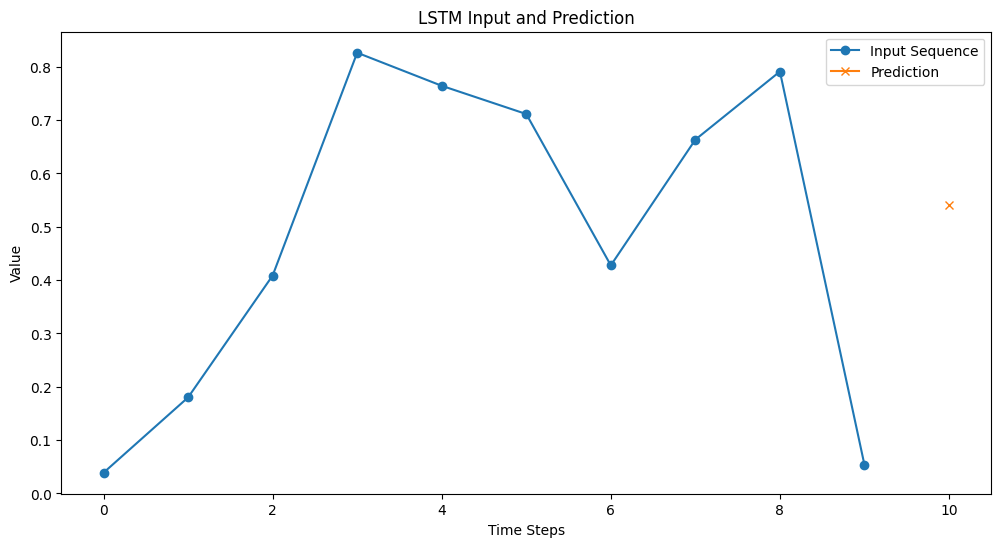

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Define an LSTM model
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, return_sequences=False))  # 50 units, input shape (timesteps, features)
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mse')
    return model

# Example data
timesteps = 10
features = 1
X = np.random.rand(100, timesteps, features)  # 100 samples, 10 timesteps, 1 feature
y = np.random.rand(100, 1)  # 100 samples, 1 target

# Create and train the model
input_shape = (timesteps, features)
model = create_model(input_shape)
model.fit(X, y, epochs=10, verbose=1)

# Plot the model architecture
plot_model(model, to_file='lstm_architecture.png', show_shapes=True, show_layer_names=True)

# Predicting with the model
predictions = model.predict(X)
print(predictions)

# Plotting the first sample input and its corresponding prediction
plt.figure(figsize=(12, 6))
plt.plot(range(timesteps), X[0], marker='o', label='Input Sequence')
plt.plot(timesteps, predictions[0], marker='x', label='Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('LSTM Input and Prediction')
plt.legend()
plt.show()


# Understanding Gates in LSTM

Long Short-Term Memory (LSTM) networks are designed to handle long-term dependencies in sequential data. The key to their effectiveness lies in the use of gates within each LSTM cell. These gates regulate the flow of information, allowing the network to maintain and update a memory state over long sequences.


**The Three Main Gates in LSTM**

 **1. Forget Gate:**
- **Purpose:** Determines which information from the previous cell state should be discarded.
Operation: Takes the previous hidden state and the current input, passes them through a sigmoid activation function, and outputs a number between 0 and 1 for each number in the cell state
$C_{t-1}$


- **Formula:** $ f_t=σ(W_f.[h_{t-1},x_t]+b_f) $

where σ is the sigmoid function ,$W_f$ are the weights,$h_{t-1}$ is the previous hidden state, $x_t$ is the current input and $b_f$ is the bias.



 **2. Input Gate:**
- **Purpose:** Decides which new information to add to the cell state.
- **Operation:** Uses a sigmoid layer to decide which values to update and a tanh layer to create new candidate values.

- **Formula:** $i_t = σ(W_i.[h_{t-1},x_t]+b_i)$
               
 $$C_t = tanh(W_C.[h_{t-1},x_t]+b_c)$$

 where $W_i$ and $W_C$ are weights, and $b_i$ and $b_C$ are biases.


**3.Output Gate:**
- **Purpose:** Determines what the next hidden state should be.
**Operation:** Uses a sigmoid layer to decide which part of the cell state to output, then applies a tanh layer to the cell state.

- **Formula:** $o_t =σ(W_o.[h{t-1},x_t]+b_o)$
   
   $h_t=o_t*tanh(C_t)$

   where $W_o$ are the weights, $h_t$ is the hidden state, and $C_t$ is the cell state.

####Visualization of LSTM Gates in Python

Epoch 1/10
4/4 [==============================] - 2s 7ms/step - loss: 0.3332
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 0.2211
Epoch 3/10
4/4 [==============================] - 0s 6ms/step - loss: 0.1415
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 0.1010
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0939
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 0.1092
Epoch 7/10
4/4 [==============================] - 0s 6ms/step - loss: 0.1085
Epoch 8/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0967
Epoch 9/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0914
Epoch 10/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0918
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
         

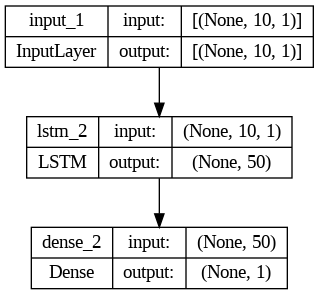

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import numpy as np

# Define an LSTM model
def create_model():
    model = Sequential()
    model.add(Input(shape=(10, 1)))  # Input shape: (timesteps, features)
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Generate example data
timesteps = 10
features = 1
X = np.random.rand(100, timesteps, features)  # 100 samples, 10 timesteps, 1 feature
y = np.random.rand(100, 1)  # 100 samples, 1 target

# Create and train the model
model = create_model()
model.fit(X, y, epochs=10, verbose=1)

# Summary of the model
model.summary()

# Plot the model architecture
tf.keras.utils.plot_model(model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)


#Training LSTM Networks

- Training LSTM networks involves several steps, including preparing the data, defining the LSTM architecture, setting the training parameters, and finally training the model. Below is an explanation of each step, followed by a Python code example to demonstrate the process.

**Steps in Training LSTM Networks
Data Preparation:**
- Sequence Data: LSTM networks are designed to handle sequential data. This data should be structured such that each sample is a sequence of time steps, and each time step can have multiple features.
- Normalization: Scale the input data to a suitable range, often between 0 and 1.
Train-Test Split: Split the data into training and testing sets.

**Defining the LSTM Architecture:**
- **Input Layer:** Define the shape of the input data.
- **LSTM Layers:** Add one or more LSTM layers, specifying the number of units in each layer.
- **Dropout Layers:** Optionally add dropout layers to prevent overfitting.
- **Dense Layer:** Add a Dense layer for the final output.

**Setting Training Parameters:**
- Loss Function: Choose an appropriate loss function, e.g., mean squared error for regression tasks or categorical cross-entropy for classification tasks.
- Optimizer: Select an optimizer, such as Adam or RMSprop.
Batch Size: Define the number of samples per batch.
- Epochs: Set the number of epochs for training.

**Training the Model:**
Use the fit method to train the model on the training data.
Optionally, use callbacks like EarlyStopping to monitor training and prevent overfitting.


####Demonstrating the training of an LSTM network using the Keras library

Epoch 1/50
20/20 [==============================] - 9s 156ms/step - loss: 1.3985e-04 - val_loss: 9.0409e-06
Epoch 2/50
20/20 [==============================] - 1s 37ms/step - loss: 3.0396e-05 - val_loss: 4.6179e-08
Epoch 3/50
20/20 [==============================] - 1s 35ms/step - loss: 1.7424e-05 - val_loss: 5.9972e-07
Epoch 4/50
20/20 [==============================] - 1s 36ms/step - loss: 1.2395e-05 - val_loss: 2.5494e-07
Epoch 5/50
20/20 [==============================] - 1s 36ms/step - loss: 9.8575e-06 - val_loss: 4.0806e-08
Epoch 6/50
20/20 [==============================] - 1s 36ms/step - loss: 9.4455e-06 - val_loss: 6.2078e-07
Epoch 7/50
20/20 [==============================] - 1s 37ms/step - loss: 8.4591e-06 - val_loss: 3.2629e-08
Epoch 8/50
20/20 [==============================] - 1s 36ms/step - loss: 7.6017e-06 - val_loss: 3.5007e-07
Epoch 9/50
20/20 [==============================] - 1s 36ms/step - loss: 6.3229e-06 - val_loss: 5.1676e-08
Epoch 10/50
20/20 [=================

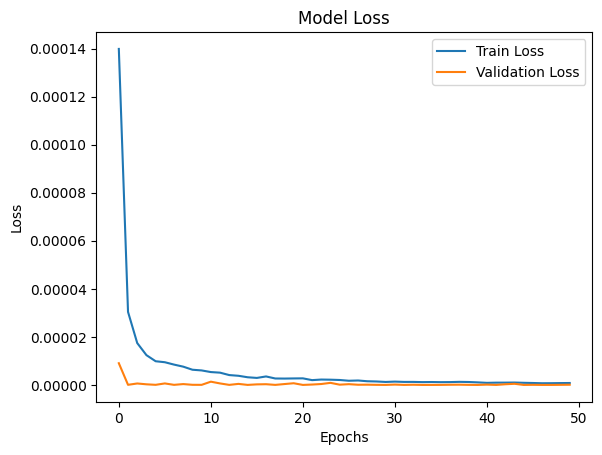

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Generate synthetic sequential data
def generate_data(seq_length, num_samples):
    X = []
    y = []
    for _ in range(num_samples):
        seq = np.sin(np.linspace(0, 2 * np.pi, seq_length))
        X.append(seq)
        y.append(seq[-1])  # Predict the last value of the sequence
    X = np.array(X)
    y = np.array(y)
    return X, y

# Data preparation
seq_length = 50
num_samples = 1000
X, y = generate_data(seq_length, num_samples)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape to (samples, timesteps, features)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {loss}')

# Plot training & validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#Applications of LSTM

####**1. Natural Language Processing (NLP)**

**. Language Modeling:**
- LSTMs can predict the next word in a sequence of words, which is essential for text generation and language modeling tasks.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample text data
texts = ["I love machine learning", "Machine learning is fascinating", "Deep learning is a branch of machine learning"]

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
total_words = len(tokenizer.word_index) + 1

# Prepare input sequences
input_sequences = []
for line in texts:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create predictors and label
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Define LSTM model
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))  # Add embedding layer
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train model
model.fit(X, y, epochs=100, verbose=1)

# To generate text from the model
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted, axis=1)[0]
        output_word = tokenizer.index_word[predicted_word_index]
        seed_text += " " + output_word
    return seed_text

# Example usage of the text generation function
seed_text = "I love"
next_words = 3
generated_text = generate_text(seed_text, next_words, model, max_sequence_len)
print(generated_text)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 7, 10)             110       
                                                                 
 lstm_10 (LSTM)              (None, 100)               44400     
                                                                 
 dense_9 (Dense)             (None, 11)                1111      
                                                                 
Total params: 45621 (178.21 KB)
Trainable params: 45621 (178.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 2.3971 - accuracy: 0.2308
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 2.3919 - accuracy: 0.3846
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 2.3867 - accur

I love learning learning is


**Machine Translation:**
- LSTMs are used in translation systems to convert text from one language to another.

**Example:**
- Google Translate and other translation services.

c. **Sentiment Analysis:**
- Analyzing the sentiment of a given text (positive, negative, neutral) is a common application of LSTMs.

**Example:**
- Analyzing customer reviews to determine overall satisfaction.





####**2. Speech Recognition and Synthesis**

- LSTMs can model temporal sequences of audio data, making them suitable for speech recognition and synthesis tasks.

**Example:**
- Voice assistants like Siri, Google Assistant, and Amazon Alexa.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Generate synthetic audio sequence data
def generate_audio_data(num_samples, timesteps, features):
    X = np.random.rand(num_samples, timesteps, features)
    y = np.random.randint(0, 2, num_samples)
    return X, y

# Data preparation
num_samples = 1000
timesteps = 100
features = 13  # Number of MFCC features
X, y = generate_audio_data(num_samples, timesteps, features)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(timesteps, features), return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
25/25 [==============================] - 7s 118ms/step - loss: 0.6964 - accuracy: 0.4938 - val_loss: 0.6975 - val_accuracy: 0.4400
Epoch 2/10
25/25 [==============================] - 2s 77ms/step - loss: 0.6942 - accuracy: 0.5100 - val_loss: 0.6968 - val_accuracy: 0.4400
Epoch 3/10
25/25 [==============================] - 2s 81ms/step - loss: 0.6950 - accuracy: 0.4762 - val_loss: 0.6970 - val_accuracy: 0.4400
Epoch 4/10
25/25 [==============================] - 3s 126ms/step - loss: 0.6932 - accuracy: 0.4863 - val_loss: 0.6927 - val_accuracy: 0.5450
Epoch 5/10
25/25 [==============================] - 2s 84ms/step - loss: 0.6944 - accuracy: 0.5200 - val_loss: 0.6990 - val_accuracy: 0.4400
Epoch 6/10
25/25 [==============================] - 2s 74ms/step - loss: 0.6938 - accuracy: 0.4850 - val_loss: 0.6941 - val_accuracy: 0.4550
Epoch 7/10
25/25 [==============================] - 2s 82ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6968 - val_accuracy: 0.4450
Epoch 8/10


####**3. Time Series Forecasting**
- LSTMs are effective in forecasting future values of a sequence based on past observations.

**Example:**
- Predicting stock prices, weather forecasting, and demand forecasting.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate synthetic time series data
def generate_time_series(num_samples, timesteps):
    data = np.sin(np.linspace(0, num_samples, num_samples*timesteps))
    return data.reshape((num_samples, timesteps, 1))

# Data preparation
timesteps = 10
num_samples = 1000
data = generate_time_series(num_samples, timesteps)
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(num_samples, timesteps, 1)

# Split data into training and testing sets
X_train, y_train = data[:800, :-1], data[:800, -1]
X_test, y_test = data[800:, :-1], data[800:, -1]

# Define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(timesteps-1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {loss}')


Epoch 1/10
20/20 [==============================] - 3s 31ms/step - loss: 0.1621 - val_loss: 0.0417
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.0401 - val_loss: 0.0343
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.0302 - val_loss: 0.0288
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.0274 - val_loss: 0.0255
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 0.0248 - val_loss: 0.0238
Epoch 6/10
20/20 [==============================] - 0s 6ms/step - loss: 0.0229 - val_loss: 0.0217
Epoch 7/10
20/20 [==============================] - 0s 9ms/step - loss: 0.0208 - val_loss: 0.0194
Epoch 8/10
20/20 [==============================] - 0s 12ms/step - loss: 0.0182 - val_loss: 0.0168
Epoch 9/10
20/20 [==============================] - 0s 9ms/step - loss: 0.0151 - val_loss: 0.0134
Epoch 10/10
7/7 [==============================] - 1s 6ms/step - loss: 0.0096
Test Loss: 0.009629114530980587


####**4. Sequence-to-Sequence Learning**
- LSTMs can be used in tasks where the input and output are both sequences, such as sequence generation and sequence classification.

**Example:**
- Generating captions for images and translating video frames into descriptive text.

####**5. Anomaly Detection**
- LSTMs are used to detect anomalies in sequential data by learning normal patterns and identifying deviations.

**Example:**
- Detecting fraudulent transactions in financial data.

####**6. Healthcare and Biomedical Applications**
- LSTMs can analyze and predict patient health metrics over time.

**Example:**
- Predicting disease progression or monitoring vital signs in real-time.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Generate synthetic healthcare time series data
def generate_healthcare_data(num_samples, timesteps, features):
    X = np.random.rand(num_samples, timesteps, features)
    y = np.random.randint(0, 2, num_samples)
    return X, y

# Data preparation
num_samples = 1000
timesteps = 30
features = 5  # Number of health metrics
X, y = generate_healthcare_data(num_samples, timesteps, features)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(timesteps, features), return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
25/25 [==============================] - 6s 82ms/step - loss: 0.6959 - accuracy: 0.4812 - val_loss: 0.6988 - val_accuracy: 0.4600
Epoch 2/10
25/25 [==============================] - 1s 24ms/step - loss: 0.6925 - accuracy: 0.5113 - val_loss: 0.6918 - val_accuracy: 0.5450
Epoch 3/10
25/25 [==============================] - 1s 24ms/step - loss: 0.6934 - accuracy: 0.5013 - val_loss: 0.6934 - val_accuracy: 0.4650
Epoch 4/10
25/25 [==============================] - 1s 25ms/step - loss: 0.6925 - accuracy: 0.5125 - val_loss: 0.6938 - val_accuracy: 0.4750
Epoch 5/10
25/25 [==============================] - 1s 24ms/step - loss: 0.6920 - accuracy: 0.5337 - val_loss: 0.6945 - val_accuracy: 0.4850
Epoch 6/10
25/25 [==============================] - 1s 25ms/step - loss: 0.6927 - accuracy: 0.5312 - val_loss: 0.6934 - val_accuracy: 0.5100
Epoch 7/10
25/25 [==============================] - 1s 24ms/step - loss: 0.6962 - accuracy: 0.4825 - val_loss: 0.6974 - val_accuracy: 0.4600
Epoch 8/10
25

#Variants of LSTM

**Gated Recurrent Unit (GRU):**
- GRUs are a simplified version of LSTMs that combine the forget and input gates into a single update gate.
- They have fewer parameters compared to LSTMs, making them computationally more efficient.
- Despite their simplicity, GRUs have been shown to perform comparably to LSTMs in many tasks.

**Peephole LSTM:**
- Peephole LSTMs extend the standard LSTM architecture by allowing the gates to access the cell state directly (via "peepholes").
- This enables the gates to incorporate additional information about the cell state during the gating process.
Peephole connections provide LSTMs with more expressive power and can improve their performance on certain tasks.

**Depth-Gated LSTM:**
- Depth-gated LSTMs introduce depth-wise gating mechanisms that operate independently along the depth dimension of the hidden state.
- This allows the LSTM to selectively update or reset different parts of the hidden state based on the input and current state.
- Depth-gated LSTMs have been shown to achieve better performance than standard LSTMs on tasks requiring long-range dependencies.

**Clockwork RNN:**
- Clockwork RNNs partition the hidden units into different groups, each operating at a different clock rate.
Units in faster groups update more frequently than units in slower groups, allowing the network to allocate computational resources dynamically.
- This architecture is particularly useful for processing sequences with hierarchical structures or varying time scales.

**LSTM with Forget Gate Bias:**
- Standard LSTMs have a forget gate that controls how much of the previous cell state to retain.
LSTM variants with forget gate bias introduce a learnable bias term to the forget gate, allowing the network to adaptively adjust the forgetting behavior.
- This can help mitigate the vanishing gradient problem and improve the model's ability to retain long-term dependencies.

**Attention-based LSTMs:**
- Attention mechanisms can be integrated into LSTM architectures to selectively focus on relevant parts of the input sequence.
- This allows the model to dynamically adjust its attention based on the input context, improving its ability to capture important information.
- Attention-based LSTMs have been particularly successful in tasks involving variable-length sequences or where certain parts of the input are more important than others.

#Implementation of LSTM

####Setting Up the Environment

In [ ]:
pip install tensorflow


####Importing Necessary Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


####Preparing the Data

In [ ]:
# Generate synthetic sequential data
def generate_synthetic_data(timesteps, features, samples):
    X = np.random.rand(samples, timesteps, features)
    y = np.random.randint(2, size=samples)
    return X, y

timesteps = 10  # Number of time steps
features = 1    # Number of features
samples = 1000  # Number of samples

X, y = generate_synthetic_data(timesteps, features, samples)

# Scale the data
scaler = MinMaxScaler()
X = X.reshape(-1, features)  # Reshape for scaling
X = scaler.fit_transform(X)
X = X.reshape(samples, timesteps, features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


####Building the LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(timesteps, features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 10, 50)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


####Training the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
20/20 [==============================] - 18s 235ms/step - loss: 0.6934 - accuracy: 0.5016 - val_loss: 0.6934 - val_accuracy: 0.4875
Epoch 2/20
20/20 [==============================] - 0s 22ms/step - loss: 0.6940 - accuracy: 0.5078 - val_loss: 0.6957 - val_accuracy: 0.4875
Epoch 3/20
20/20 [==============================] - 0s 14ms/step - loss: 0.6924 - accuracy: 0.5141 - val_loss: 0.6940 - val_accuracy: 0.4875
Epoch 4/20
20/20 [==============================] - 0s 12ms/step - loss: 0.6918 - accuracy: 0.5297 - val_loss: 0.6936 - val_accuracy: 0.4875
Epoch 5/20
20/20 [==============================] - 0s 13ms/step - loss: 0.6932 - accuracy: 0.4938 - val_loss: 0.6938 - val_accuracy: 0.4875
Epoch 6/20
20/20 [==============================] - 0s 12ms/step - loss: 0.6931 - accuracy: 0.5188 - val_loss: 0.6938 - val_accuracy: 0.4875
Epoch 7/20
20/20 [==============================] - 0s 12ms/step - loss: 0.6940 - accuracy: 0.4563 - val_loss: 0.6935 - val_accuracy: 0.4938
Epoch 8/20


####Evaluating the Model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


7/7 [==============================] - 1s 4ms/step - loss: 0.6962 - accuracy: 0.5100
Test Accuracy: 51.00%


####Visualizing the Training Process

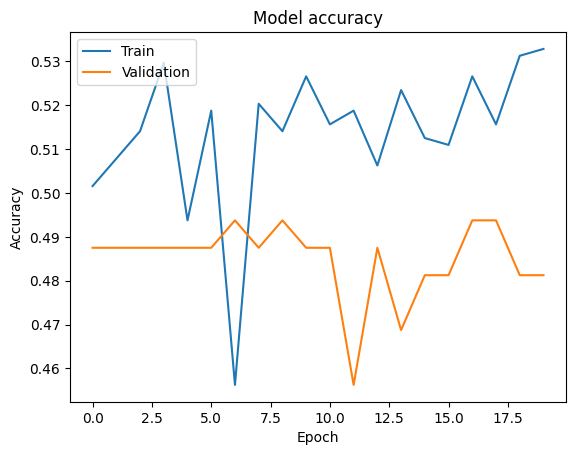

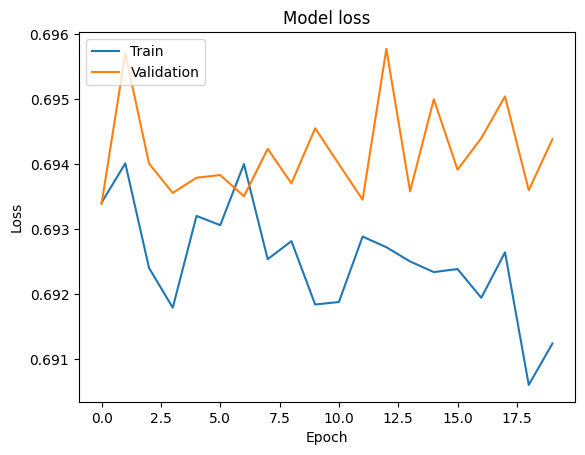

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


####**Summary**
- Data Preparation: The synthetic data generation creates random sequences for a simple binary classification task. The data is then scaled and split into training and testing sets.

- Model Building: The LSTM model is built using the Keras Sequential API. It consists of two LSTM layers with dropout for regularization, followed by a Dense layer with a sigmoid activation function for binary classification.

- Training: The model is trained using the Adam optimizer and binary cross-entropy loss. The training history, including accuracy and loss, is recorded for visualization.

- Evaluation: The model's performance is evaluated on the test set, and the accuracy is printed.

- Visualization: Training and validation accuracy and loss are plotted to visualize the training process.

